In [26]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
df = pd.read_csv('Twitter_Data.csv')


# Tokenization

In [27]:
texts = df['clean_text'].tolist()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = str(text)  # Convert to string
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

prepared_data = list(map(preprocess_text, texts))

In [19]:
df.head()

,clean_text,category,text_length
0,when modi promised “minimum government maximum...,-1,210
1,talk all the nonsense and continue all the dra...,0,68
2,what did just say vote for modi welcome bjp t...,1,117
3,asking his supporters prefix chowkidar their n...,1,212
4,answer who among these the most powerful world...,1,81


In [20]:
df.tail()

,clean_text,category,text_length
162975,why these 456 crores paid neerav modi not reco...,-1,108
162976,dear rss terrorist payal gawar what about modi...,-1,248
162977,did you cover her interaction forum where she ...,0,51
162978,there big project came into india modi dream p...,0,77
162979,have you ever listen about like gurukul where ...,1,216


In [21]:
df.shape

(162969, 3)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   clean_text   162969 non-null  object
 1   category     162969 non-null  int32 
 2   text_length  162969 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.4+ MB


In [23]:
df.dtypes

clean_text     object
category        int32
text_length     int64
dtype: object

# Feature Extraction

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(prepared_data)

In [9]:
# Align X and labels based on common indices
df_clean = df.dropna(subset=['clean_text', 'category'])
texts = df_clean['clean_text'].tolist()
labels = df_clean['category'].tolist()

# Re-extract features and preprocess data
prepared_data = list(map(preprocess_text, texts))
X = vectorizer.fit_transform(prepared_data)

In [10]:
# Modify the preprocess_text function to handle NaN values
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

prepared_data = list(map(preprocess_text, texts))

# Model Building 
# Training and Testing the Data

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

classifier = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9044916242253176


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Data Visualization

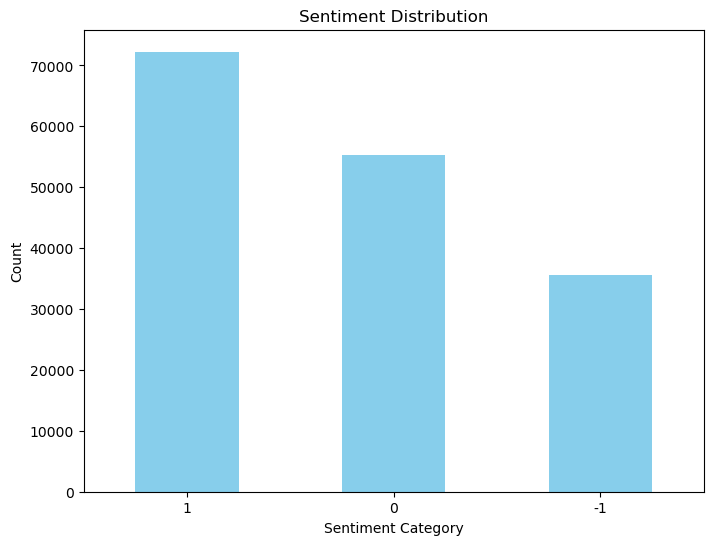

In [12]:
import matplotlib.pyplot as plt

# Count the number of each sentiment category
sentiment_counts = df['category'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

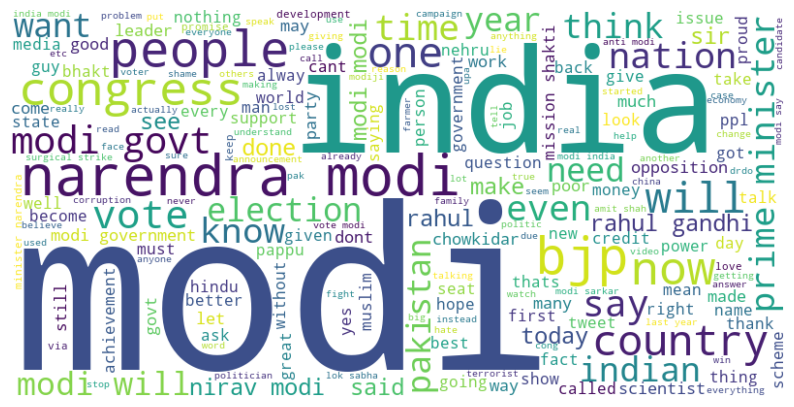

In [13]:
from wordcloud import WordCloud

# Combine all text data into a single string
all_text = ' '.join(df['clean_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

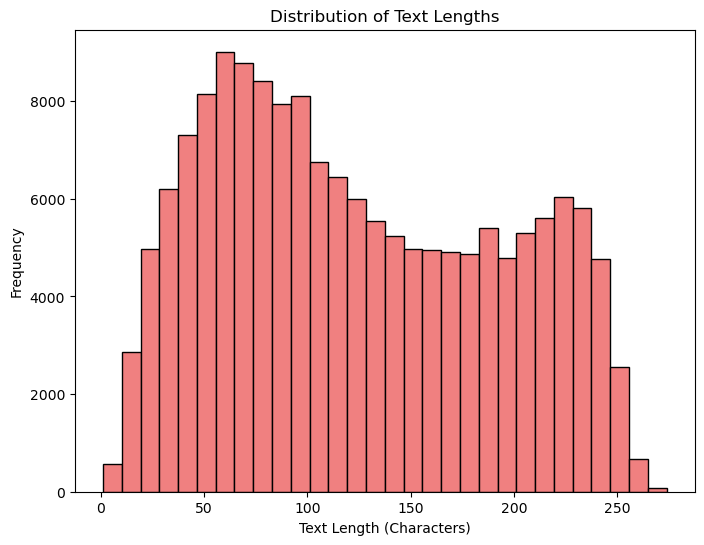

In [14]:
# Calculate text lengths
text_lengths = df['clean_text'].apply(len)

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.show()

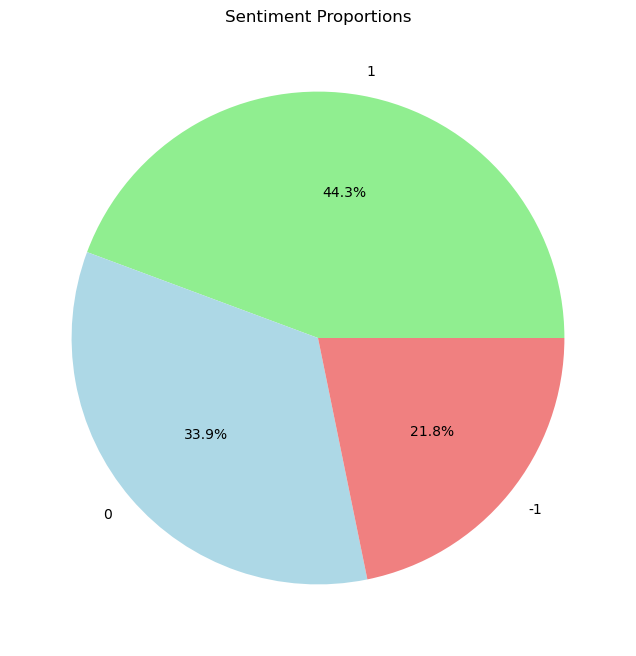

In [15]:
# Calculate sentiment proportions
sentiment_proportions = df['category'].value_counts(normalize=True)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_proportions, labels=sentiment_proportions.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Sentiment Proportions')
plt.show()

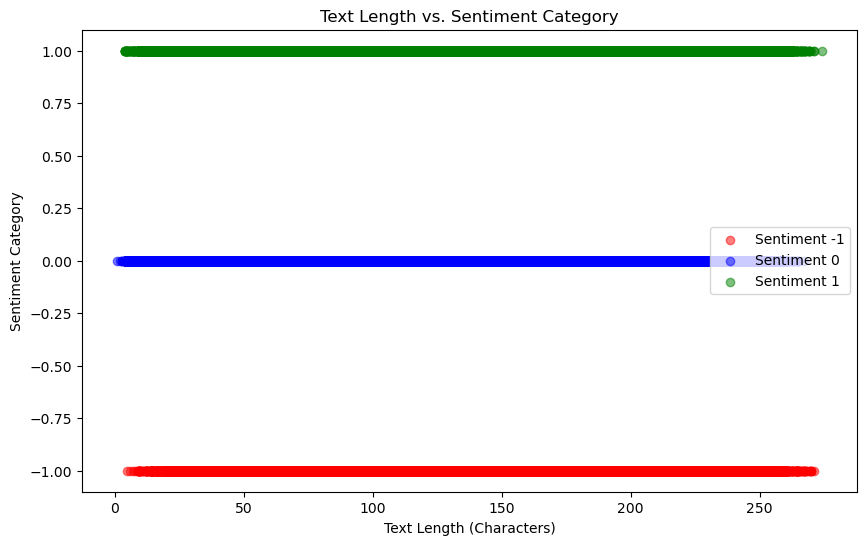

In [16]:
# Add text length to the DataFrame
df['text_length'] = df['clean_text'].apply(len)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
colors = {1: 'green', 0: 'blue', -1: 'red'}
for category in [-1, 0, 1]:
    plt.scatter(df[df['category'] == category]['text_length'], df[df['category'] == category]['category'], color=colors[category], label=f'Sentiment {category}', alpha=0.5)
plt.title('Text Length vs. Sentiment Category')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Sentiment Category')
plt.legend()
plt.show()